# Histogram Equalization

C:\Users\Khaled\AppData\Local\Temp\ipykernel_20996\1527058902.py:14: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.flatten(),256,[0,256], color = 'r')


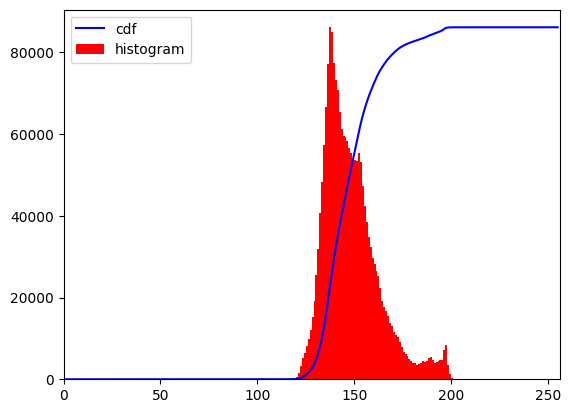

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('weki.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
 
hist,bins = np.histogram(img.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

(683, 1024, 3)


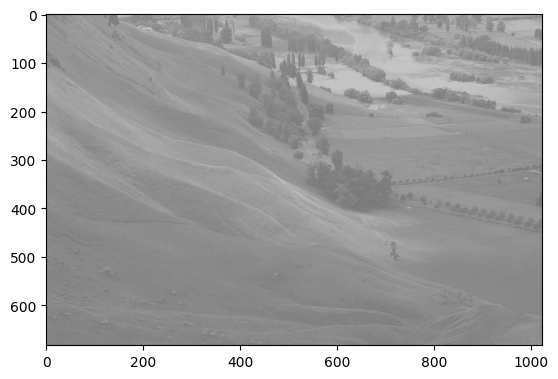

In [2]:
print(img.shape)
plt.imshow(img)
plt.show()

In [7]:
#show the Negative of our image
maxi=max(img.flatten())
mini=min(img.flatten())
print(mini, maxi)
diff=maxi-mini
print("Contrast is = " + str(diff))
img2=img-diff

114 208
Contrast is = 94


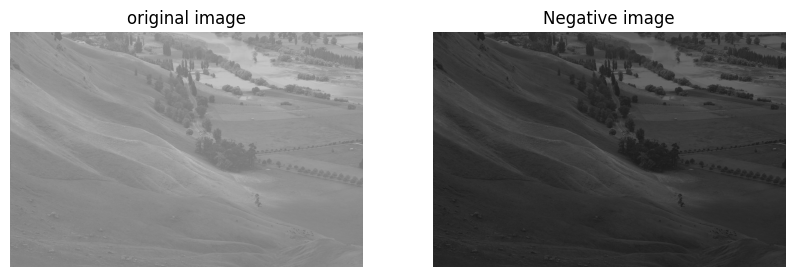

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("original image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img2,cmap='gray')
plt.title("Negative image")
plt.axis('off') 
plt.show()

# Histograms Equalization in OpenCV

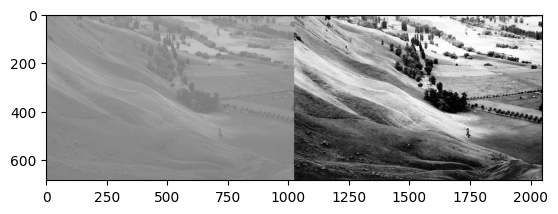

In [11]:
img = cv.imread('weki.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('res.png',res)
plt.imshow(res, cmap='gray')

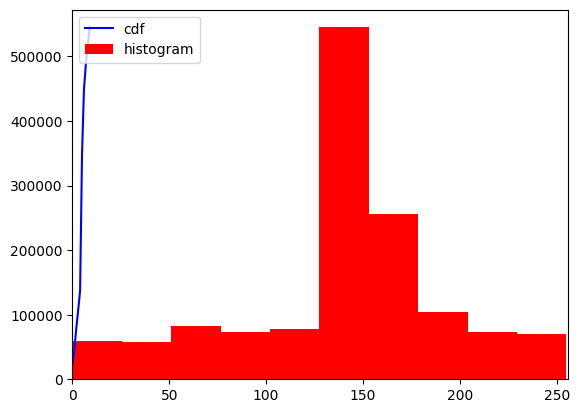

In [12]:
hist,bins = np.histogram(res.flatten())
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(res.flatten(), color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [13]:
import numpy as np
import cv2 as cv
 
img = cv.imread('weki.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

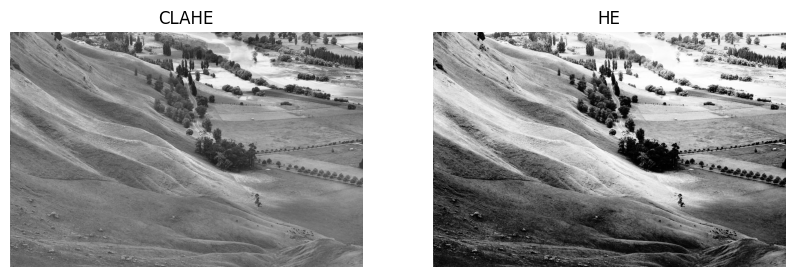

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cl1,cmap='gray')
plt.title("CLAHE")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(equ,cmap='gray')
plt.title("HE")
plt.axis('off') 
plt.show()

In [15]:
import numpy as np
import cv2 as cv
from skimage import data
img=data.moon()
#img = cv.imread('13949.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

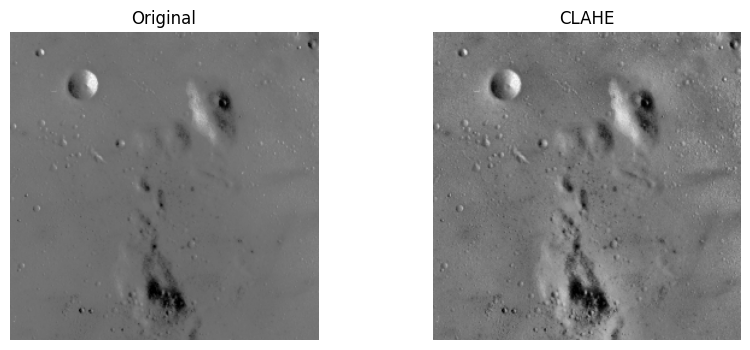

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cl1,cmap='gray')
plt.title("CLAHE")
plt.axis('off') 
plt.show()

In [17]:
equ = cv.equalizeHist(img)

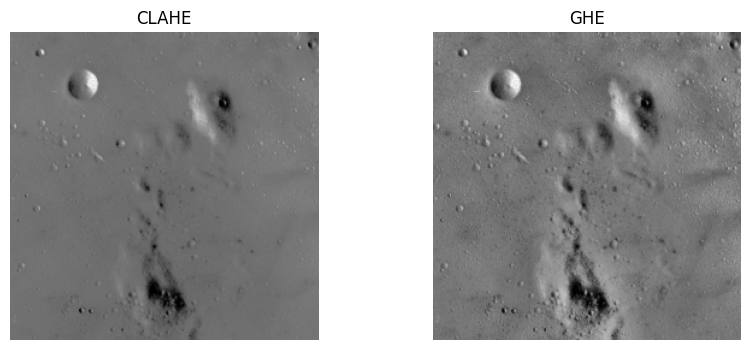

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("CLAHE")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cl1,cmap='gray')
plt.title("GHE")
plt.axis('off') 
plt.show()

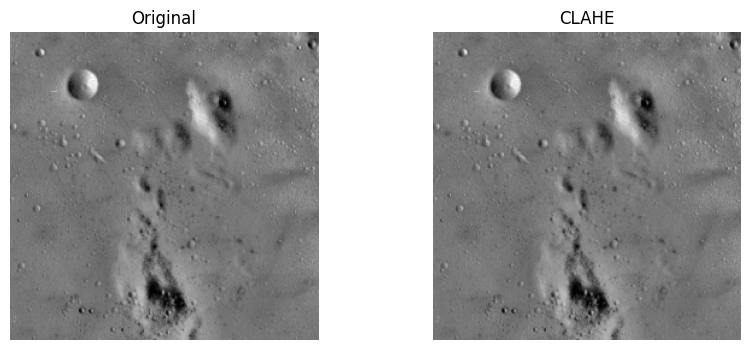

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cl1,cmap='gray')
plt.title("Original")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cl1,cmap='gray')
plt.title("CLAHE")
plt.axis('off') 
plt.show()

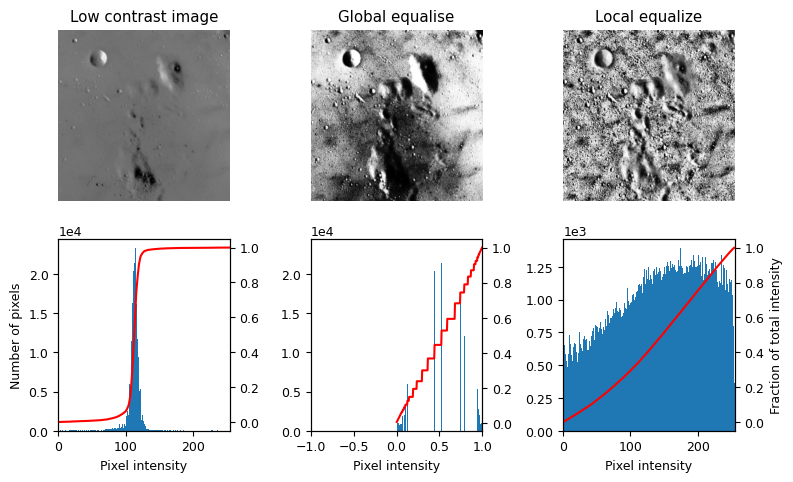

In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank


matplotlib.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = img_as_ubyte(data.moon())

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
footprint = disk(30)
img_eq = rank.equalize(img, footprint=footprint)


# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()